#### 1. Simple linear regression with gradient descent method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

In [2]:
data = {"salary": [1.7, 2.4, 2.3, 3.1, 3.7, 4.2, 4.4, 6.1, 5.4, 5.7, 6.4, 6.2], "experience": [1.2, 1.5, 1.9, 2.2, 2.4, 2.5, 2.8, 3.1, 3.3, 3.7, 4.2, 4.4]}
df = pd.DataFrame(data)

df.to_csv('salary.csv', index=False)  # Ensure index is not written

In [3]:
y=df['salary'].values
x=df['experience'].values
slope = [0.1,0.8,1.5]
intercept = 1.1
cost = []

for i in slope:
    y_pred = i*x + intercept
    mse = mean_squared_error(y, y_pred)
    cost.append(mse)

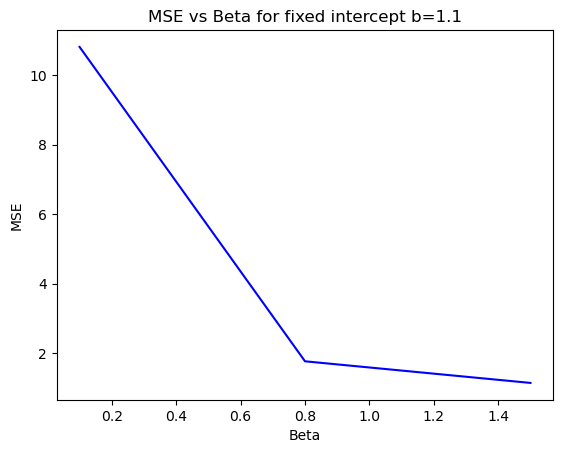

In [4]:
plt.plot(slope, cost, color='blue')
plt.xlabel('Beta')
plt.ylabel('MSE')
plt.title('MSE vs Beta for fixed intercept b=1.1')
plt.show()

In [5]:
beta = np.arange(0,1.51,0.01)
b = 1.1
cost2=[]

for i in beta:
    y_pred = i*x + b
    mse = mean_squared_error(y, y_pred)
    cost2.append(mse)

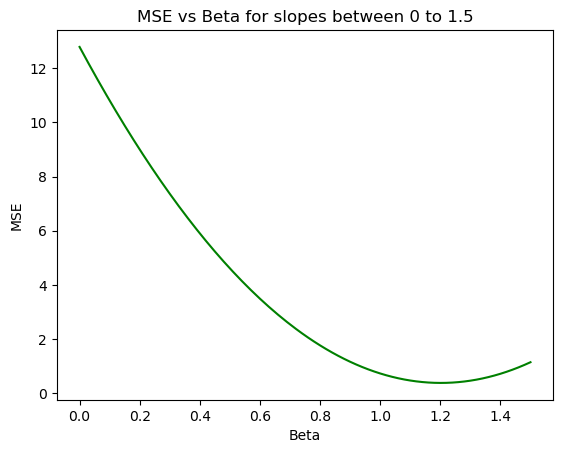

In [6]:
plt.plot(beta, cost2, color='green')
plt.xlabel('Beta')
plt.ylabel('MSE')
plt.title('MSE vs Beta for slopes between 0 to 1.5')
plt.show()

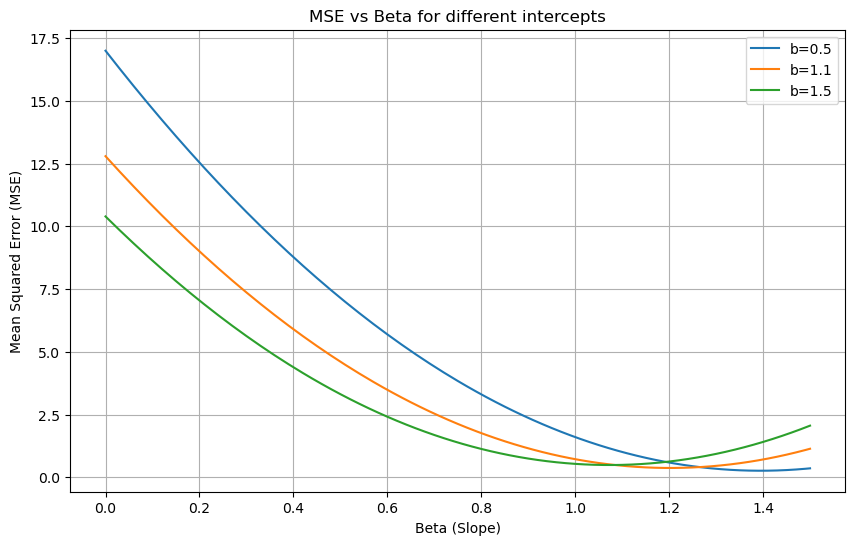

In [7]:
intercepts = [0.5, 1.1, 1.5]
mse_values_c = {}

for b in intercepts:
    mse_values_c[b] = [mean_squared_error(y, j * x + b) for j in beta]

plt.figure(figsize=(10, 6))

for b, mse_vals in mse_values_c.items():
    plt.plot(beta, mse_vals, linestyle='-', label=f'b={b}')

plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Beta for different intercepts')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
x_reshape = x.reshape(-1,1)

model = LinearRegression()
model.fit(x_reshape, y)

y_pred = model.predict(x_reshape)
mse_model = mean_squared_error(y, y_pred)
slope = model.coef_[0]
inter = model.intercept_

print(f'MSE: {mse_model:.6f}, Slope: {slope:.6f}, Intercept: {inter:.6f}')

MSE: 0.233667, Slope: 1.567098, Intercept: -0.035639


#### 2. Logistic Regression with SGD

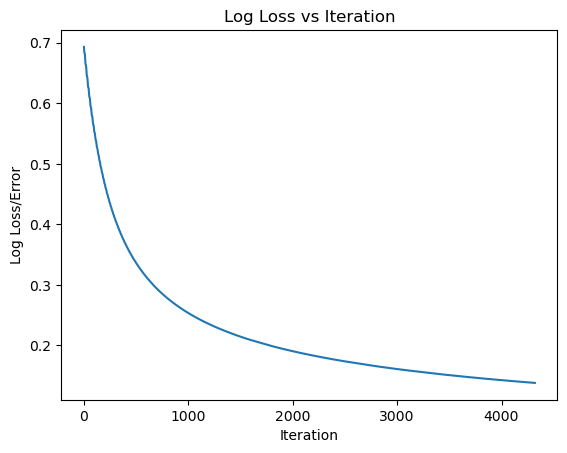

Manual SGD Results: B0=0.1799019658271764, B1=3.7937098374723393, Final Error=0.138165273938024


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('salary.csv')

threshold = df['salary'].median()
df['target'] = (df['salary'] > threshold).astype(int)

scaler = StandardScaler()
df['experience'] = scaler.fit_transform(df[['experience']])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

X = df['experience'].values
y = df['target'].values
m = len(y)

B0 = 0
B1 = 0
alpha = 0.01
iterations = 60
epochs = 6
errors = []

for epoch in range(epochs):
    for i in range(iterations):
        for j in range(m):
            xi = X[j]
            yi = y[j]
            z = B0 + B1 * xi
            y_pred = sigmoid(z)
            error = log_loss(y, sigmoid(B0 + B1 * X))
            errors.append(error)
            B0 = B0 - alpha * (y_pred - yi)
            B1 = B1 - alpha * (y_pred - yi) * xi

plt.plot(errors)
plt.xlabel('Iteration')
plt.ylabel('Log Loss/Error')
plt.title('Log Loss vs Iteration')
plt.show()

print(f"Manual SGD Results: B0={B0}, B1={B1}, Final Error={errors[-1]}")


In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='saga', max_iter=iterations * epochs)
model.fit(df[['experience']], df['target'])

B0_sklearn = model.intercept_[0]
B1_sklearn = model.coef_[0][0]
y_pred = model.predict_proba(df[['experience']])[:, 1]
error_sklearn = log_loss(y, y_pred)

print(f"Scikit-learn SGD Results: B0={B0_sklearn}, B1={B1_sklearn}, Final Error={error_sklearn}")

Scikit-learn SGD Results: B0=0.034863119879654916, B1=1.5752908006865365, Final Error=0.2939804866856494


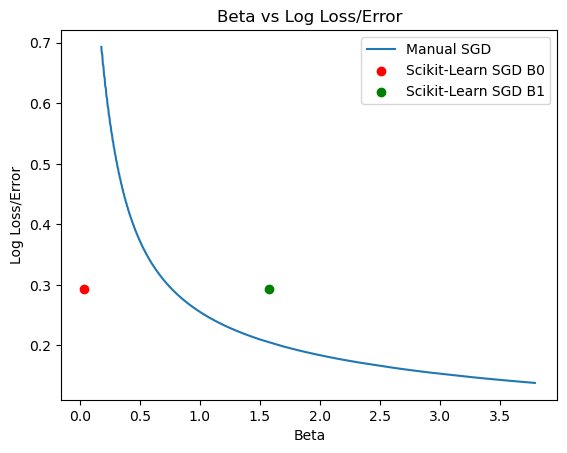

In [17]:
betas = np.linspace(B0, B1, len(errors))

plt.plot(betas, errors, label='Manual SGD')

plt.scatter([B0_sklearn], [error_sklearn], color='red', label='Scikit-Learn SGD B0')
plt.scatter([B1_sklearn], [error_sklearn], color='green', label='Scikit-Learn SGD B1')

plt.xlabel('Beta')
plt.ylabel('Log Loss/Error')
plt.legend()
plt.title('Beta vs Log Loss/Error')
plt.show()

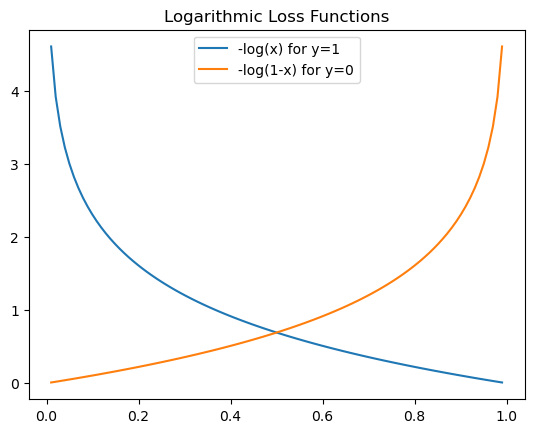

In [18]:
x = np.linspace(0.01, 0.99, 100)
log_y1 = -np.log(x)
log_y0 = -np.log(1-x)

plt.plot(x, log_y1, label='-log(x) for y=1')
plt.plot(x, log_y0, label='-log(1-x) for y=0')
plt.legend()
plt.title('Logarithmic Loss Functions')
plt.show()

#### 3. Positive and Negative slope dataset with linear regression

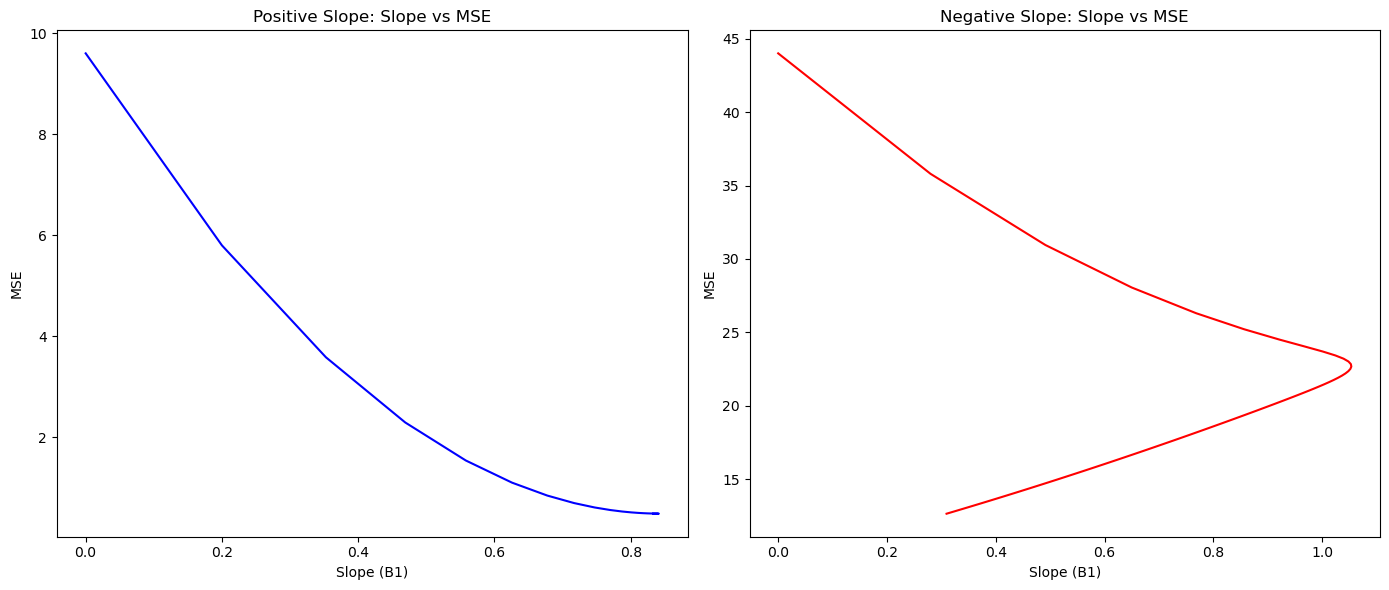

In [21]:
def compute_mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

def gradient_descent(x, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    B0 = 0
    B1 = 0
    mse_list = []
    B1_list = []
    
    for _ in range(iterations):
        y_pred = B0 + B1 * x
        mse = compute_mse(y, y_pred)
        mse_list.append(mse)
        B1_list.append(B1)
        
        dB0 = (-2/m) * np.sum(y - y_pred)
        dB1 = (-2/m) * np.sum((y - y_pred) * x)
        
        B0 -= learning_rate * dB0
        B1 -= learning_rate * dB1
        
    return B1_list, mse_list

x1 = np.array([1, 2, 4, 3, 5])
y1 = np.array([1, 3, 3, 2, 5])
B1_list_pos, mse_list_pos = gradient_descent(x1, y1, learning_rate=0.01, iterations=100)

x2 = np.array([1, 2, 3, 4, 5])
y2 = np.array([10, 8, 6, 4, 2])
B1_list_neg, mse_list_neg = gradient_descent(x2, y2, learning_rate=0.01, iterations=100)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(B1_list_pos, mse_list_pos, color='blue')
plt.xlabel('Slope (B1)')
plt.ylabel('MSE')
plt.title('Positive Slope: Slope vs MSE')

plt.subplot(1, 2, 2)
plt.plot(B1_list_neg, mse_list_neg, color='red')
plt.xlabel('Slope (B1)')
plt.ylabel('MSE')
plt.title('Negative Slope: Slope vs MSE')

plt.tight_layout()
plt.show()

#### 4. Positive and Negative slope dataset with logistic regression

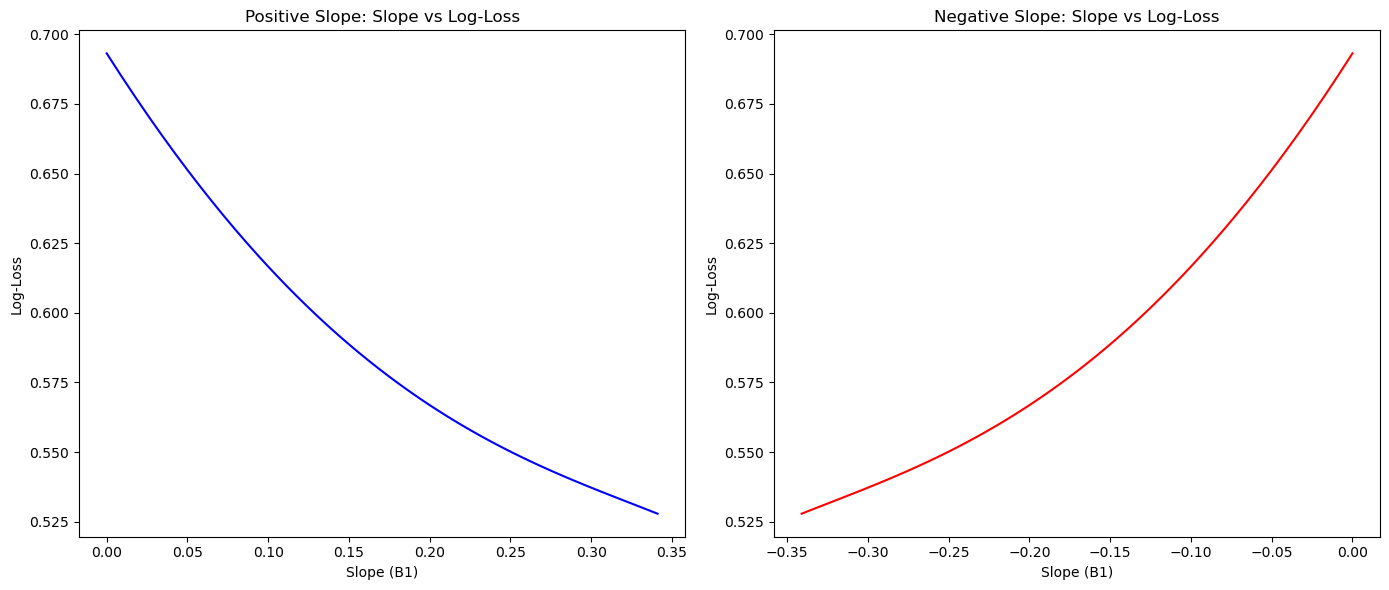

In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def gradient_descent_logistic(x, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    B0 = 0
    B1 = 0
    log_loss_list = []
    B1_list = []
    
    for _ in range(iterations):
        z = B0 + B1 * x
        y_pred = sigmoid(z)
        loss = log_loss(y, y_pred)
        log_loss_list.append(loss)
        B1_list.append(B1)
        
        dB0 = (1/m) * np.sum(y_pred - y)
        dB1 = (1/m) * np.sum((y_pred - y) * x)
        
        B0 -= learning_rate * dB0
        B1 -= learning_rate * dB1
        
    return B1_list, log_loss_list

x1 = np.array([1, 2, 3, 4, 5])
y1 = np.array([0, 0, 1, 1, 1])
B1_list_pos, log_loss_list_pos = gradient_descent_logistic(x1, y1, learning_rate=0.01, iterations=100)

x2 = np.array([1, 2, 3, 4, 5])
y2 = np.array([1, 1, 0, 0, 0])
B1_list_neg, log_loss_list_neg = gradient_descent_logistic(x2, y2, learning_rate=0.01, iterations=100)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(B1_list_pos, log_loss_list_pos, color='blue')
plt.xlabel('Slope (B1)')
plt.ylabel('Log-Loss')
plt.title('Positive Slope: Slope vs Log-Loss')

plt.subplot(1, 2, 2)
plt.plot(B1_list_neg, log_loss_list_neg, color='red')
plt.xlabel('Slope (B1)')
plt.ylabel('Log-Loss')
plt.title('Negative Slope: Slope vs Log-Loss')

plt.tight_layout()
plt.show()
